In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.special import gamma
from scipy import optimize

from interaction import potential
from counterterm import local_LO_counterterm
import constants as const

plt.style.use('science')

In [2]:
rgflow_lo = np.loadtxt('rgflow_local_lo_a0_fix_hp_n_14_coord_ir_corrected.txt')

In [3]:
rgflow_lo.shape

(95, 2)

In [4]:
stop = np.where(const.BETA4/rgflow_lo[:, 0] < 70)[0][-1]

In [5]:
const.BETA4 / rgflow_lo[40, 0]

44.848484848484844

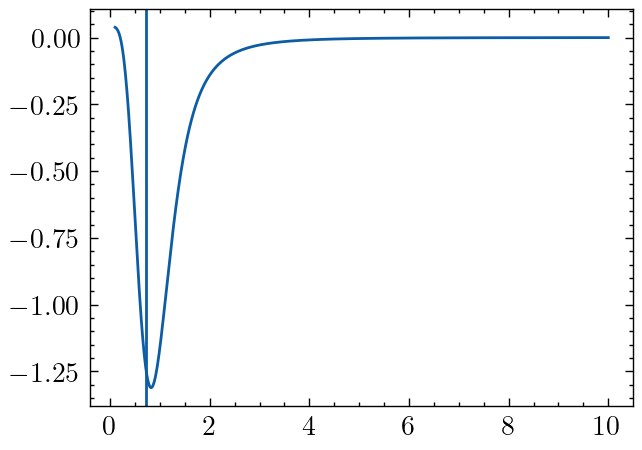

In [6]:
start = 40

Ri, gi = rgflow_lo[start]

rs = np.linspace(0.1, 10, 1000)

fig, ax = plt.subplots(dpi=200)
fig.patch.set_facecolor('white')

ax.plot(rs, potential(rs, Ri) + gi*local_LO_counterterm(rs, Ri))
ax.axvline(Ri);

In [23]:
guess = 0.2

for (Ri, gi) in rgflow_lo[start:stop, :]:
    f = lambda r: potential(r, Ri) + gi*local_LO_counterterm(r, Ri)
    result = optimize.fsolve(f, guess)
    guess = result[0]
    print(f'{result[0]:.4f}  {Ri:.4f}')

0.2028  0.7293
0.2562  0.7196
0.2925  0.7101
0.3218  0.7009
0.3470  0.6919
0.3694  0.6832
0.3896  0.6746
0.4081  0.6663
0.4253  0.6582
0.4414  0.6503
0.4564  0.6425
0.4706  0.6350
0.4840  0.6276
0.4966  0.6204
0.5086  0.6133
0.5199  0.6064
0.5306  0.5997
0.5407  0.5931
0.5503  0.5866
0.5593  0.5803
0.5678  0.5742
0.5758  0.5681
0.5834  0.5622
0.5905  0.5564
0.5971  0.5507
0.6034  0.5452
0.6093  0.5397
0.6149  0.5344
0.6201  0.5291
0.6250  0.5240
0.6296  0.5190
0.6340  0.5140
0.6381  0.5092
0.6419  0.5044
0.6455  0.4997
0.6490  0.4951
0.6522  0.4906
0.6552  0.4862
0.6581  0.4819
0.6608  0.4776


In [8]:
Phis = np.array([])
guess = 0.1

for (Ri, gi) in rgflow_lo[start:stop, :]:
    v = lambda r: potential(r, Ri) + gi*local_LO_counterterm(r, Ri)
    result = optimize.fsolve(v, guess)
    guess = result[0]
    r_0 = result[0]
    
    f = lambda r: np.sqrt(-2*const.MU*(potential(r, Ri) + gi*local_LO_counterterm(r, Ri)))
    result = quad(f, r_0, np.infty)
    Phis = np.append(Phis, result[0])

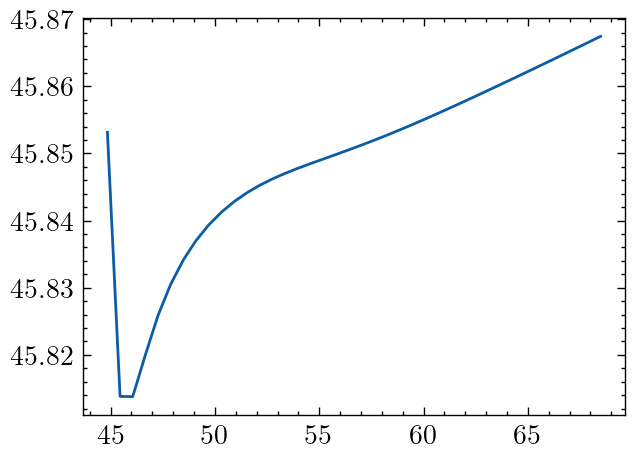

In [9]:
fig, ax = plt.subplots(dpi=200)
fig.patch.set_facecolor('white')

ax.plot(const.BETA4/rgflow_lo[start:stop, 0], Phis);

In [10]:
def I(n):
    return (n * gamma(1 - 1/n) * gamma(1/2 + 1/n)) / ((n-2) * np.sqrt(np.pi))

In [11]:
def flambaum_delta(k, Phi, n):
    return Phi + np.pi/4 - I(n) * (const.BETA4**(2/(n-2))*k)**((n-2)/n)

In [12]:
ks = np.linspace(0.001/const.BETA4, 100/const.BETA4, 500)

In [13]:
deltas = np.array([flambaum_delta(ks, phi, 4) for phi in Phis])

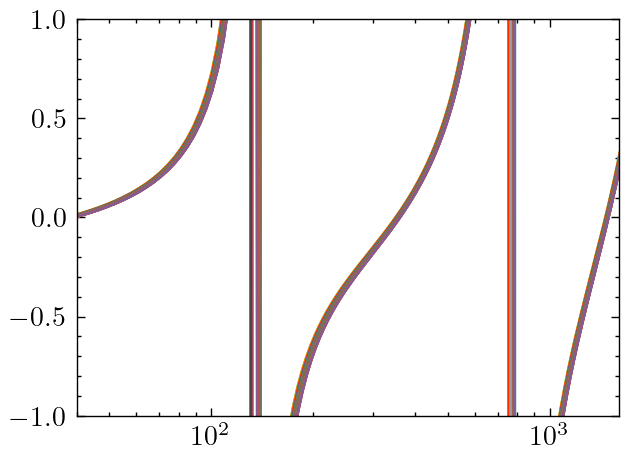

In [14]:
fig, ax = plt.subplots(dpi=200)
fig.patch.set_facecolor('white')

for row in deltas:
    ax.plot((ks*const.BETA4)**2, ks/np.tan(row))

ax.set_ylim([-1, 1])
ax.set_xlim([40, 1600])
ax.set_xscale('log');

In [15]:
low, med, high = np.quantile(ks/np.tan(deltas), [0.16, 0.5, 0.84], axis=0)

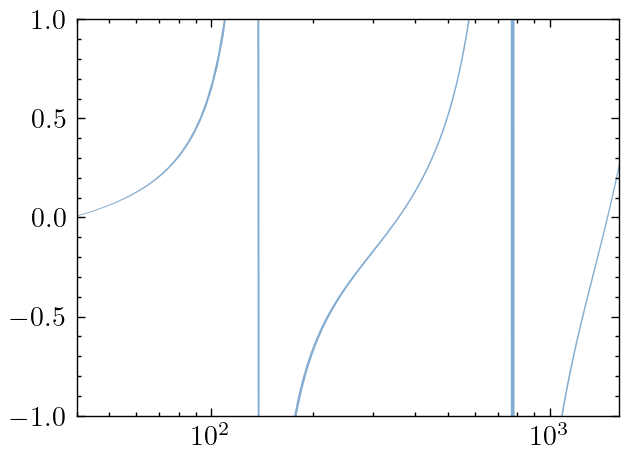

In [16]:
fig, ax = plt.subplots(dpi=200)
fig.patch.set_facecolor('white')

# ax.plot((ks*const.BETA4)**2, ks/np.tan(row))
ax.fill_between((ks*const.BETA4)**2, low, high, alpha=0.5)

ax.set_ylim([-1, 1])
ax.set_xlim([40, 1600])
ax.set_xscale('log');

In [17]:
# np.savetxt('flambaum_kcd_wide_dense.txt', np.vstack((ks, low, high)).T)

In [18]:
deltas.shape

(40, 500)

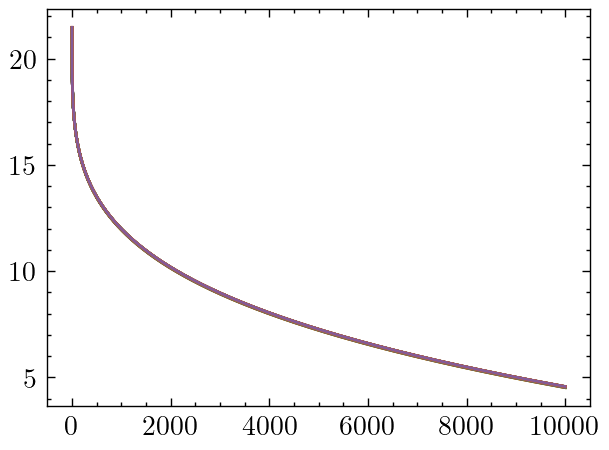

In [19]:
fig, ax = plt.subplots(dpi=200)
fig.patch.set_facecolor('white')

for row in deltas:
    ax.plot((ks*const.BETA4)**2, row - 8*np.pi)

# ax.set_ylim([-1, 1])
# ax.set_xlim([40, 1600]);
# ax.set_xscale('log');

In [20]:
low_delta, med_delta, high_delta = np.quantile(deltas - 7*np.pi, [0.16, 0.5, 0.84], axis=0)

In [21]:
# np.savetxt('flambaum_deltas_wide_dense.txt', np.vstack((ks, low_delta, med_delta, high_delta)).T)